In [92]:
import pandas as pd

In [93]:
pd.set_option('display.max_columns', None)

In [94]:
Data = pd.read_csv('Data.csv')

In [95]:
Data

,Referencia,Fecha,Cliente,Importe,Direccion,Localidad,Codigo Postal,Producto,Linea,Ancho,Largo,sexo,Edad
0,DK20220267,2022-11-12,"""CAYETANA 690031741""",120.0,NaN,NaN,NaN,no sé,no sé,1,1,M,no sé
1,DK20220265,2022-11-08,"""CONTADO TIENDA """,25.0,.,NaN,.,no sé,no sé,1,1,no sé,no sé
2,DK20220264,2022-11-08,"""CONTADO TIENDA """,25.0,.,NaN,.,no sé,no sé,1,1,no sé,no sé
3,DK20220263,2022-11-07,"""ANA DE ARMADA """,57.0,NaN,NaN,NaN,no sé,no sé,1,1,M,no sé
4,DK20220262,2022-11-05,"""LAURA DE GUZMAN """,245.0,NaN,NaN,NaN,no sé,no sé,1,1,M,no sé
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,DK18103,2018-09-17,"""BELEN MARTINEZ (FACCIA TOSTA)""",270.0,"""Pasaje de Caleruega, 13-2ﾺC""",Madrid,28033,no sé,no sé,1,1,no sé,no sé
1018,FAC18082,2018-07-03,"""GUSTAVO CARASA ANTON""",375.0,.,MADRID,28005,no sé,no sé,1,1,no sé,no sé
1019,FAC18081,2018-06-21,"""PALOMA SAEZ""",45.0,"""C/Santa Hortencia, 22-3ﾺD""",MADRID,28002,no sé,no sé,1,1,no sé,no sé
1020,FAC18080,2018-06-20,"""CONTADO TIENDA """,365.0,.,NaN,.,no sé,no sé,1,1,no sé,no sé


In [96]:
Serie_Temp = Data.loc[: , ['Fecha' , 'Importe']]

In [97]:
Serie_Temp['Fecha'] = pd.to_datetime(Serie_Temp['Fecha'])

In [98]:
Serie_Temp

,Fecha,Importe
0,2022-11-12,120.0
1,2022-11-08,25.0
2,2022-11-08,25.0
3,2022-11-07,57.0
4,2022-11-05,245.0
...,...,...
1017,2018-09-17,270.0
1018,2018-07-03,375.0
1019,2018-06-21,45.0
1020,2018-06-20,365.0


In [99]:
Serie_Temp['Mes'] = Serie_Temp['Fecha'].dt.month
Serie_Temp['Año'] = Serie_Temp['Fecha'].dt.year

In [100]:
Serie_Temp_2 = Serie_Temp.groupby(['Año' , 'Mes']).sum().reset_index(drop=False) 

Serie_Temp_2 = Serie_Temp_2.rename(columns={'Importe' : 'Ingresos_Totales'})

In [101]:
Serie_Temp_2.head()

,Año,Mes,Ingresos_Totales
0,2018,6,428.0
1,2018,7,375.0
2,2018,9,8007.0
3,2018,10,2717.6
4,2018,11,5342.0


In [102]:
Serie_Temp_2['Año'] = Serie_Temp_2['Año'].astype('string')
Serie_Temp_2['Mes'] = Serie_Temp_2['Mes'].astype('string')

In [103]:
Serie_Temp_2['id'] = range(0, len(Serie_Temp_2))

In [104]:
import numpy as np

In [105]:
np.repeat(['Enero', 'Febrero', 'Marzo'], 4)

array(['Enero', 'Enero', 'Enero', 'Enero', 'Febrero', 'Febrero',
       'Febrero', 'Febrero', 'Marzo', 'Marzo', 'Marzo', 'Marzo'],
      dtype='<U7')

In [106]:
Serie_Temp_2['Mes-Año'] = Serie_Temp_2.Mes.str.cat(Serie_Temp_2.Año, sep='-')

In [107]:
Serie_Temp_2.head()

,Año,Mes,Ingresos_Totales,id,Mes-Año
0,2018,6,428.0,0,6-2018
1,2018,7,375.0,1,7-2018
2,2018,9,8007.0,2,9-2018
3,2018,10,2717.6,3,10-2018
4,2018,11,5342.0,4,11-2018


In [108]:
import seaborn as sns

In [115]:
sns.set(rc={'figure.figsize':(15,8)})

In [110]:
import matplotlib.pyplot as plt

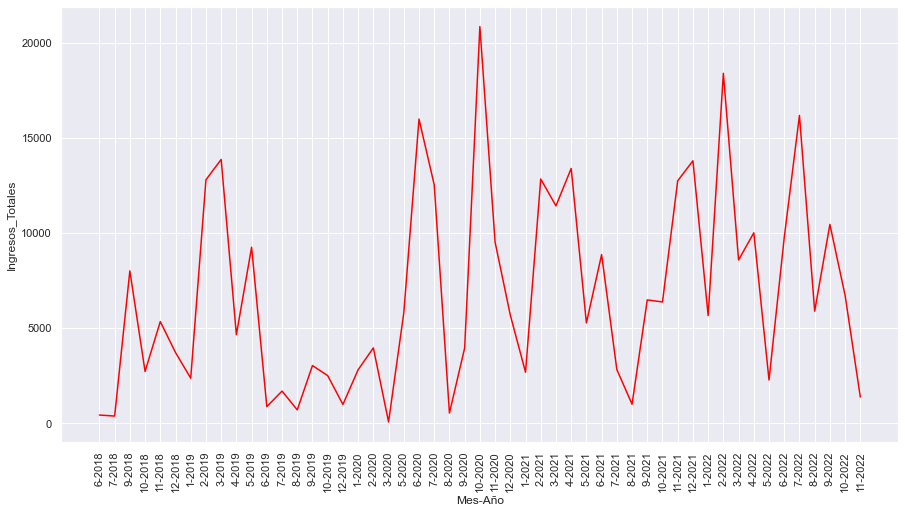

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()

p=sns.lineplot(x="Mes-Año", y="Ingresos_Totales", data=Serie_Temp_2 , color='red')

plt.setp(p.get_xticklabels(), rotation=90)

fig.savefig('p2.jpg', format='jpg', dpi=1200)

plt.show()